# Project: How to tell a story using Data

I want to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so I and my partners decide to try to attract investors. They are interested in the current market conditions. For some market research open source data on restaurants in LA are used.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import file rest_data_us.csv

try:
    file = pd.read_csv('C:/Users/andre/OneDrive/Desktop/practicum_100/project 2/rest_data_us.csv', delimiter=',')
except:
    file = pd.read_csv('/datasets/rest_data_us.csv', delimiter=',')
    

## Step 1 Prepare the data for analysis
•	Rename the columns in a way that's convenient for you
•	Check for missing values and data types. Correct the data if needed
•	Add a date and time column and a separate column for dates


In [3]:
print('Info about dataset file')
display(file.info())
print()
print('First 5 rows of dataset file')
display(file.head())
print()
print('Last 5 rows of dataset file')
display(file.tail())
print()
print('sample row of dataset file')
display(file.sample())

Info about dataset file
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


None


First 5 rows of dataset file


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20



Last 5 rows of dataset file


,id,object_name,address,chain,object_type,number
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6
9650,21436,CAFE SPROUTS,1300 S SAN PEDRO ST STE 111,True,Restaurant,19



sample row of dataset file


,id,object_name,address,chain,object_type,number
8592,20378,BURGER KING #06023,7201 S FIGUEROA AVE,True,Fast Food,81


In [4]:
#check datatypes of file
file.dtypes

id              int64
object_name    object
address        object
chain          object
object_type    object
number          int64
dtype: object

In [5]:
#change dtypes of object_type and chain columns
file.chain = file.chain.astype(bool)
file.object_type = file.object_type.astype('category')
#check datatypes again 
file.dtypes

id                int64
object_name      object
address          object
chain              bool
object_type    category
number            int64
dtype: object

In [6]:
file.describe(include='all').round(2)


,id,object_name,address,chain,object_type,number
count,9651.00,9651,9651,9651,9651,9651.00
unique,NaN,8672,8517,2,6,NaN
top,NaN,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,False,Restaurant,NaN
freq,NaN,47,11,5972,7255,NaN
mean,16611.00,NaN,NaN,NaN,NaN,43.70
std,2786.15,NaN,NaN,NaN,NaN,47.62
min,11786.00,NaN,NaN,NaN,NaN,1.00
25%,14198.50,NaN,NaN,NaN,NaN,14.00
50%,16611.00,NaN,NaN,NaN,NaN,27.00
75%,19023.50,NaN,NaN,NaN,NaN,46.00


In [7]:
#check for missing values in each column
file.columns.isnull()

array([False, False, False, False, False, False])

In [8]:
#check for duplicated in these columns
print(file.duplicated(subset=['id']).any())
print(file.duplicated(subset=['object_name']).any())

False
True


In [9]:
perc_v = file['object_name'].duplicated(keep=False).value_counts(normalize=True) * 100
print(perc_v)

False    84.426484
True     15.573516
Name: object_name, dtype: float64


In [10]:
#drop duplicated items
file = file.drop_duplicates(subset=['object_name'])

#### Dataframe consits of:
> from 8672 to 9651 entries
>7 colums

#### columns & data types :
> id:           8672 -  int64                                                                                           
object_name:  8672 -  object                                                                                                
address:      8672 -  object                                                                                               
chain:        8672  -  bool                                                                                      
object_type: 8672 -  category                                                                                                  
number: 8672  -  int64                                                                                                        
street_name:  8672 -  object                                                                                                


#### change dtypes of object_type and chain columns
'chain' changed in to boolean
'object_type' changed into category


#### Description of 'file'
##### description of file 'number
count: 	8672.00                                                                                                              
mean:	44.71                                                                                                                  
std :	48.49                                                                                                                 
min :	1.00                                                                                                                
25% :	14.00                                                                                                                
50% :	27.00                                                                                                                
75% :	47.00                                                                                                                 
max :	229.00                                                                                                              



##### description of file 'street_name'
count: 8672                                                                                                            
unique: 	934                                                                                                          
top: 	BLVD                                                                                                                  
freq: 	324                                                                                                              

##### description of file 'object_type'
count: 8672                                                                                                              
unique: 	6                                                                                                                 
top: 	Restaurant                                                                                                            
freq: 	6665                                                                                                                  

##### description of file 'chain'
count: 8672                                                                                                                
unique: 	2                                                                                                                   
top: 	False                                                                                                             
freq: 	5941                                                                                                             


##### description of file 'object_name'
count: 8672                                                                                                                   
unique: 	8672                                                                                                            
top: 	CHA CHA CHA                                                                                                         
freq: 	11                                                                                                                     


##### no missing data & no corrupted data

##### Drop Duplicates
Then two of the columns were checked for duplicate values and only in the 'object_name' column duplicates were found which were removed. Further processing doesn't seem to be necessary.


## Step 2.  **Data Analysis**

**Investigate the proportions of the various types of establishments. Plot a graph.**

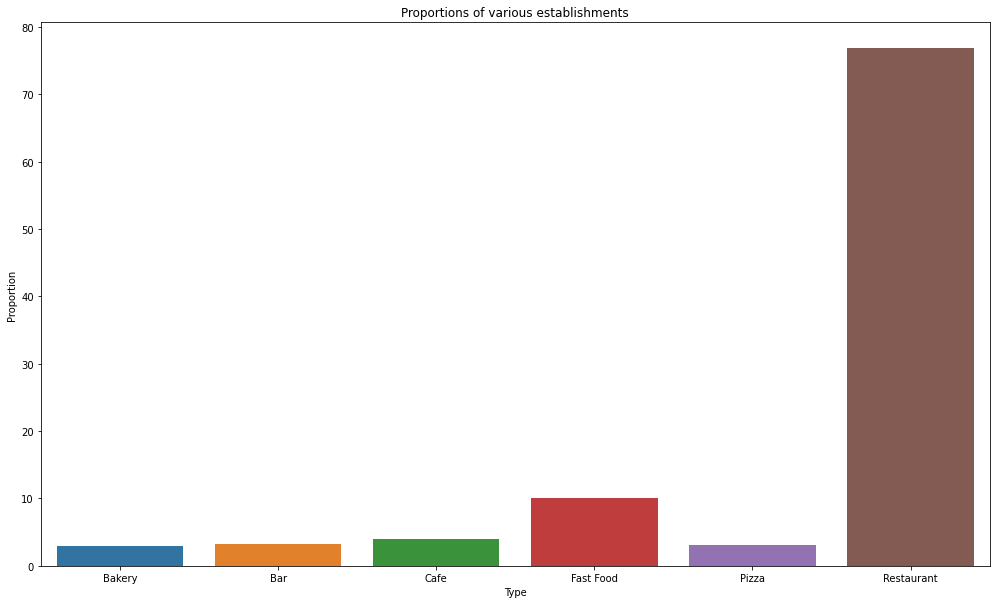

,id
object_type,
Bakery,2.940498
Bar,3.171125
Cafe,3.943727
Fast Food,10.055351
Pizza,3.032749
Restaurant,76.856550


In [11]:
#compute percentage of each establishment
df = pd.DataFrame(file.groupby(by='object_type').id.count().astype(float))
df = 100.0*df/df.sum()

#plot graph
fig,ax = plt.subplots(figsize=(17, 10))
sns.barplot(data=df, x=df.index, y='id')
plt.xlabel("Type")
plt.ylabel("Proportion")
plt.title("Proportions of various establishments")
plt.savefig('Proportions of various establishments.png')
plt.show()
df


Highest proportion exist in establishment like restaurants, but not in Cafe, Bakeries and Bars. 
The cause lies in the fact that all these establishement (bar, pizza, fast food, cafe, bar & bakery) are restaurants too, only offering specialized dining & drinking establishment, e.g.A café is a beverage shop, where tea and coffee, alongside foods like baked biscuits, are sold. A bakery is where specialty is concentrated on baking flour-based foods like pies, cakes including bread.

**Investigate the proportions of chain and nonchain establishments. Plot a graph.**



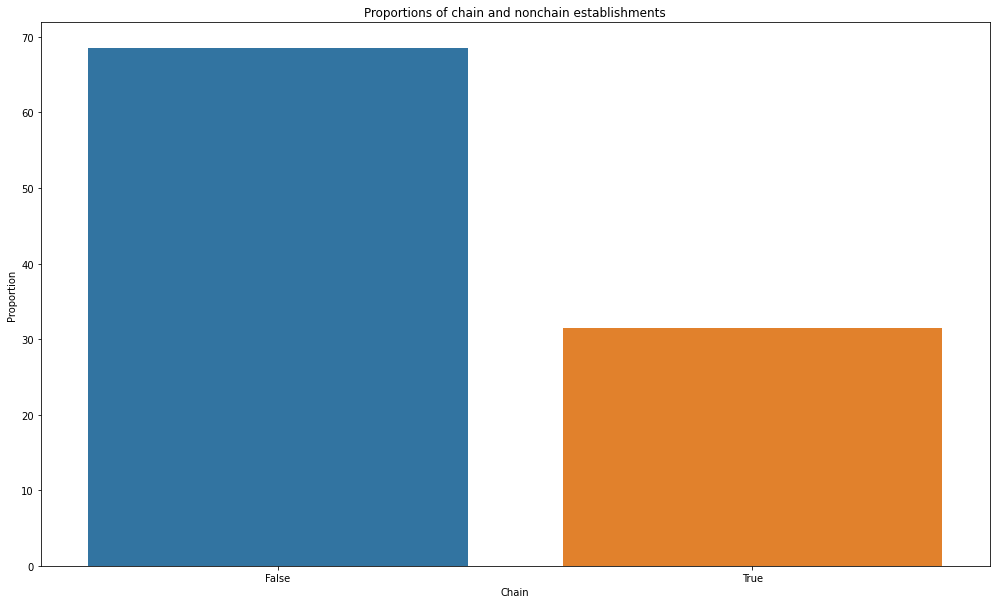

,chain,id
0,False,68.507841
1,True,31.492159


In [12]:
#compute percentage of each establishment
df = pd.DataFrame(file.groupby(by='chain').id.count().astype(float))
df = 100.0*df/df.sum()

#reset index
df = df.reset_index()
#plot graph
fig,ax = plt.subplots(figsize=(17, 10))
sns.barplot(data=df, x='chain', y='id')
plt.xlabel("Chain")
plt.ylabel("Proportion")
plt.title("Proportions of chain and nonchain establishments")
plt.savefig('Proportions of chain and nonchain establishments.png')
plt.show()
df

Most of the establishments are not part of chains (31%)

**Which type of establishment is typically a chain?
What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?**

In [13]:
#groupby chain and describe
file.groupby(by='chain').number.describe()

,count,mean,std,min,25%,50%,75%,max
chain,,,,,,,,
False,5941.0,46.178421,49.873694,1.0,14.0,28.0,47.0,229.0
True,2731.0,41.519590,45.184213,1.0,13.0,26.0,45.0,229.0


It is hard to say there is any difference between the number of seats of chain and non-chain establishments. On average the Non-chains have 46 seats while the chain establishments have 42 seats. There is also not much difference between percentile values.

In [14]:
#compute number of each establishment
df = pd.DataFrame(file.groupby(by=['object_type','chain']).id.count())

df.T

object_type Bakery         Bar        Cafe       Fast Food       Pizza        \
chain        False True  False True  False True      False True  False True    
id               0   255   214    61   168   174       457   415   164    99   

object_type Restaurant        
chain            False True   
id                4938  1727

It seems like most of the time Bakeries are chains establishments. And Bars and restaurants are most of the time not chains. Therefore we can say that chain establishments are typically Bakeries, Cafes, Fast Foods and Pizza places.

**Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs**

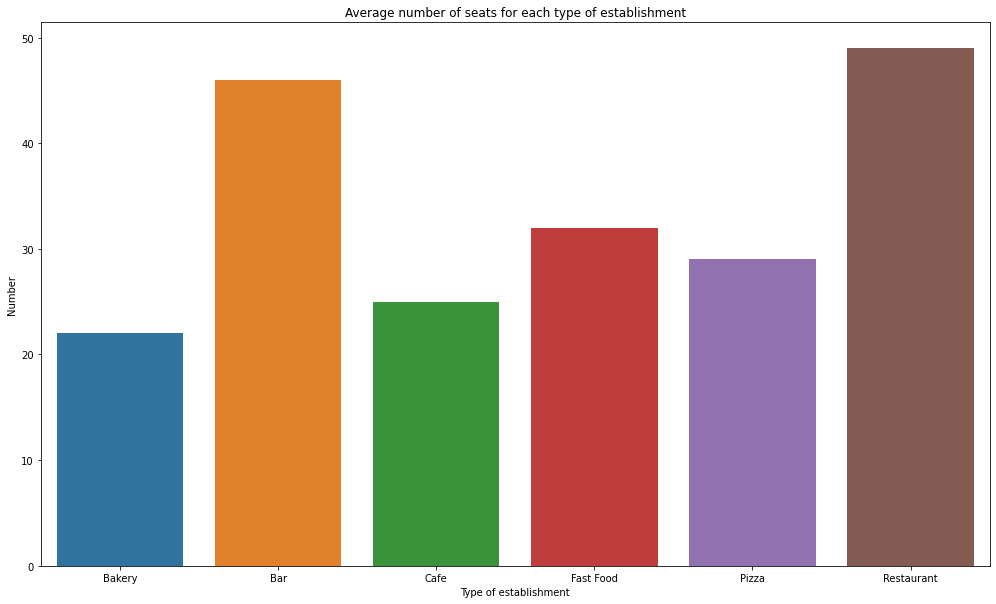

,object_type,number
0,Bakery,22.0
1,Bar,46.0
2,Cafe,25.0
3,Fast Food,32.0
4,Pizza,29.0
5,Restaurant,49.0


In [15]:
#compute percentage of each establishment
df = pd.DataFrame(file.groupby(by='object_type').number.mean()).round(0)

#reset index
df = df.reset_index()
#plot graph
fig,ax = plt.subplots(figsize=(17, 10))

sns.barplot(data=df, x='object_type', y='number')
plt.xlabel("Type of establishment")
plt.ylabel("Number")
plt.title("Average number of seats for each type of establishment")
plt.savefig('Average number of seats for each type of establishment.png')

plt.show()
df

On average Restaurants have the greatest number of seats with 49 seats followed by Bars, which contains 46. With a large distance you can find in average 32 seats in Fast Food restaurants and 29 in pizza restaurant. The fewest seats can be found in bakeries (22) and in in cafe (25)


**Put the data on street names from the address column in a separate column.**

In [16]:
#iterate through file and make necessary adjustments
for num, line in file.iterrows():
  strings = line.address.split(' ')
  if '#'in strings:
    strings = strings[1:strings.index('#')]
  else:
    strings = strings[1:]
  if '/'in strings[0]:
    strings = strings[1:]
  if any(i.isdigit() for i in strings[-1]):
    strings = strings[:-1]
  if any(i.isdigit() for i in strings[-1]):
    strings = strings[:-1]
  if '#' in strings[-1]:
    strings = strings[:-1]
  if strings[-1] == 'STE':
    strings = strings[:-1]
  strings = ' '.join(strings)
  file.at[num, 'street_name'] = strings

file.head()

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


**Plot a graph of the top ten streets by number of restaurants.**

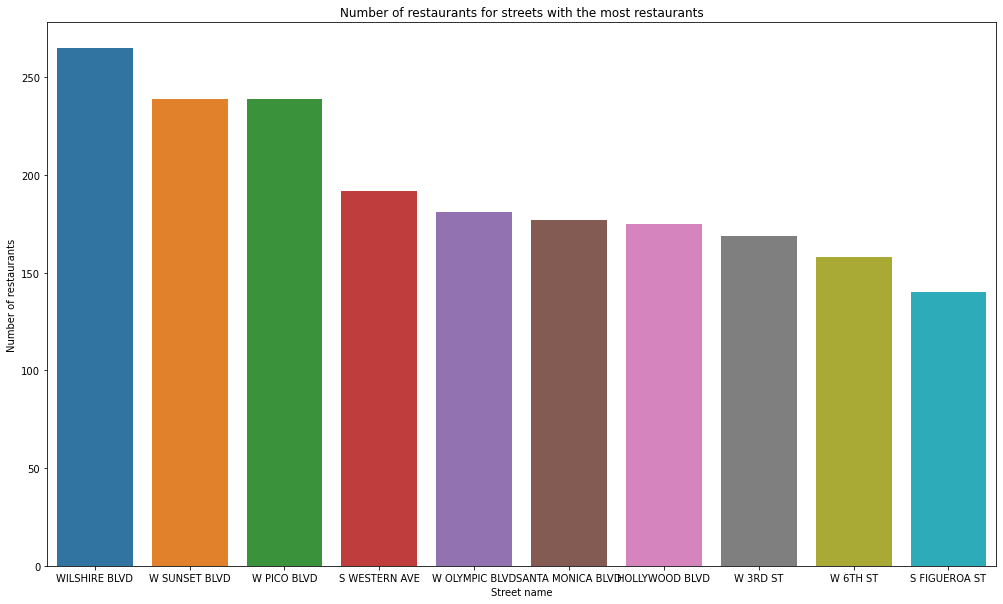

In [17]:
#find number of restaurants for each street and sort them
df = pd.DataFrame(file[file.object_type=='Restaurant'].groupby(by='street_name').id.count())
df.sort_values(by='id', ascending=False, inplace=True)

#select top 10
df2 = df[:10]

#reset index
df2 = df2.reset_index()
#plot graph
fig,ax = plt.subplots(figsize=(17, 10))
sns.barplot(data=df2, x='street_name', y='id')
plt.xlabel("Street name")
plt.ylabel("Number of restaurants")
plt.title("Number of restaurants for streets with the most restaurants")
plt.savefig('Number of restaurants for streets with the most restaurants.png')

plt.show()

Highest number of restaurant can be found in the Wilshire Boulevard, followed by the famous Sunset Boulveard, Santa Monica Boulevard, Hollywood Boulevard, which are the most famous streets in Los Angeles - mentioned in a lot of movies and tourist attraction, that#s why you can find rather a higher density of restaurants there. S Western Avenue is second longest streat in LA, and comes across quite a lot of residential areas and industry district (with less density of restaurants). The same goes for Figuerda Street with the least number of restaurant more than 100 fewer restaurants than in the Wilshire Boulevard and Pico Boulvard with the 3rd highest number of restaurants.  

**Find the number of streets that only have one restaurant.**

In [18]:
#find number of restaurants for each street
df = pd.DataFrame(file[file.object_type=='Restaurant'].groupby(by='street_name').id.count())

#number of the streets with 
num_streets = df[df.id==1].shape[0]

num_streets

450

There are 450 streets that only have one Restaurant.

**For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?**

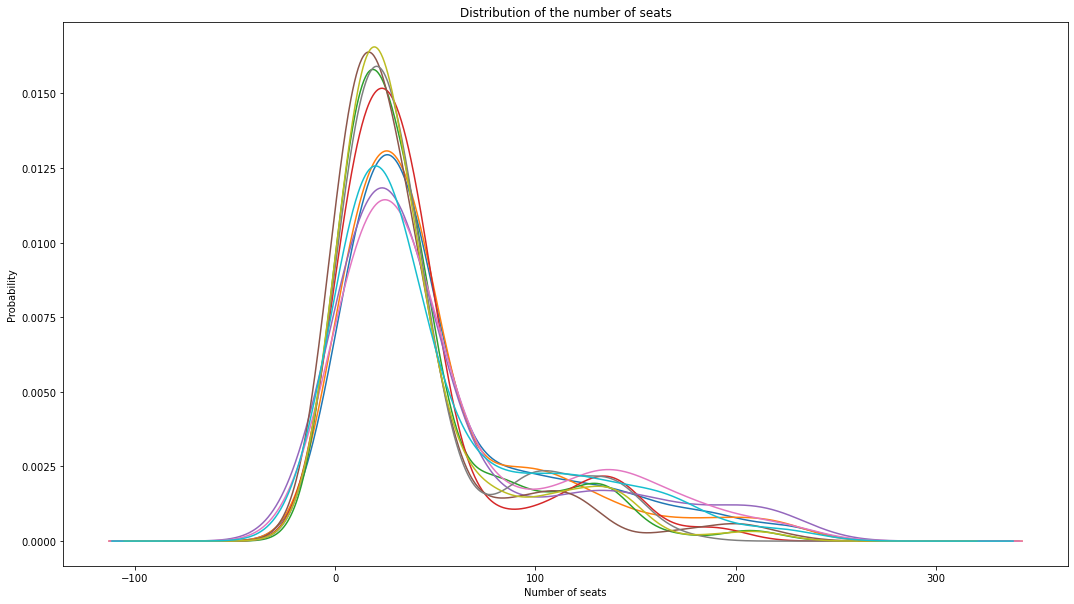

In [19]:
#plot a density plot for each street with high number of restaurants
fig,ax = plt.subplots(figsize=(18, 10))
for index, street in df2.iterrows():
  file2 = file[file.street_name==street.street_name]
  #plot graph
  file2.number.plot.kde()
plt.xlabel("Number of seats")
plt.ylabel("Probability")
plt.title("Distribution of the number of seats")
plt.savefig('Distribution of the number of seats.png')

plt.show()

As we can see there a very nice and interesting pattern in the distribution plots for the number of seats for the restaurants in each street. Most of the restaurants have around 10-15 seats. All of the streets have pretty much the same distribution patter.

# ** Conclusion**

In this project we have used data from restaurants and other food establishments in Los Angeles.

We prepared the data by checking datatypes, missing values and duplicates. The issues were easily handled. We then moved on to the Data Analysis stages. 

We started by investigating the proportions of various types of establishments and ploting graphs to represent the proportions. Highest proportion exist in establishment like restaurants, but not in Cafe, Bakeries and Bars.

We then investigated the proportions of chain and non-chain establishments and identified which factors characterizes chain and non-chain establishments. Most of the establishments are not part of chains (31%). It seems like most of the time Bakeries are chains establishments. And Bars and restaurants are most of the time not chains. Therefore we can say that chain establishments are typically Bakeries, Cafes, Fast Foods and Pizza places. It is hard to say there is any difference between the number of seats of chain and non-chain establishments. On average the Non-chains have 46 seats while the chain establishments have 42 seats. There is also not much difference between percentile values.

There are 450 streets that only have one Restaurant. Highest number of restaurant can be found in the ilshire Boulevard, followed by the famous Sunset Boulveard and Pico Boulevard. The least number of restaurants can be found in the Figuerda Street with more than 100 fewer restaurants than in the Wilshire Boulevard

We then turned to the average number of seats for each type of restaurant. On average Restaurants have the greatest number of seats followed by Bars.


Then we looked at the streets with a high number and low number of restaurants and also investigated the distributions of the number of seats of the restaurants for streets with high number of restaurants.  Most of the restaurants have around 10-15 seats. All of the streets have pretty much the same distribution patter.


For us we have to establish our restaurant in a street with high frequency and lower number of establishment. So I’ll recommend the ‘6th Street’ (close to Wilshire Blvd. and Hollywood). First only one café – with the option to create a chain With more than 20 seats


Presentation: <https://drive.google.com/file/d/1J-GGesRU90wuLcvGl-2k4y5HWIm8Zc4Q/view?usp=sharing> 
